In [1]:
%matplotlib inline

In [2]:
from pylab import *
import pylab
import matplotlib as mpl
import numpy as np
import lnm
from graph import Graph
import ipywidgets as widgets
from IPython.display import display, HTML
from stats import *

mpl.rcParams['savefig.dpi'] = 150
OPTIONS = {'FSM (HEAD)': 'results_fsm_head.txt',
           'KCFA (6.2.1)': 'results_kcfa_6_2_1.txt',
           'KCFA (HEAD)': 'results_kcfa_head.txt',
           'Morse Code (HEAD)': 'results_morse-code_head.txt',
           'Snake (HEAD)': 'results_snake_head.txt',
           'Snake (6.2.1)': 'results_snake_6_2_1.txt',
           'Tetris (6.2.1)': 'results_tetris_6_2_1.txt',
           'Tetris (HEAD)': 'results_tetris_head.txt',
           'Tetris (HEAD+UNROLL)': 'results_tetris_head_unroll.txt',
           'Sieve (6.2.1)': 'results_sieve_6_2_1.txt',
           'Sieve (HEAD)': 'results_sieve_head.txt',
           'Suffix Tree (6.2.1)': 'results_suffixtree_6_2_1.txt',
           'Suffix Tree (HEAD)': 'results_suffixtree_head.txt',
           'Synth (HEAD)':'results_synth_head.txt',
           'Synth (6.2.1)': 'results_synth_6_2_1.txt'}
s = widgets.Dropdown(options=OPTIONS)
all_data_files = ['results_fsm_head.txt',
                  'results_morse-code_head.txt',
                  'results_snake_head.txt',
                  'results_tetris_head_unroll.txt',
                  'results_sieve_head.txt',
                  'results_kcfa_head.txt',
                  'results_suffixtree_head.txt',
                  'results_synth_head.txt']
def strip_name(name):
    return name.rpartition("_")[0].partition("_")[2]

In [48]:
display(s)

In [49]:
benchmark = strip_name(s.value)
HTML("<h1>Benchmark: '" + benchmark + "'</h1>")

# Select Benchmark:

In [50]:
graph = lnm.read_data(s.value)
variations, data = graph.ungraph()
hidden_untyped = data[0,2]
pycket_untyped = data[0,1]
racket_untyped = data[0,0]
hidden = data[:,2]
pycket = data[:,1]
racket = data[:,0]

In [51]:
hidden_slowdown = hidden / float(hidden_untyped)
pycket_slowdown = pycket / float(pycket_untyped)
racket_slowdown = racket / float(racket_untyped)
    
rs_, ps_, hs_, weights_ = zip(*[make_slowdown_data(fname) for fname in all_data_files])
rs = reduce(np.append, rs_)
ps = reduce(np.append, ps_)
hs = reduce(np.append, hs_)
weights = reduce(np.append, weights_)
print weights.shape, rs.shape, ps.shape, hs.shape

(2036,) (2036,) (2036,) (2036,)


# All Data

## All Benchmarks for Hidden

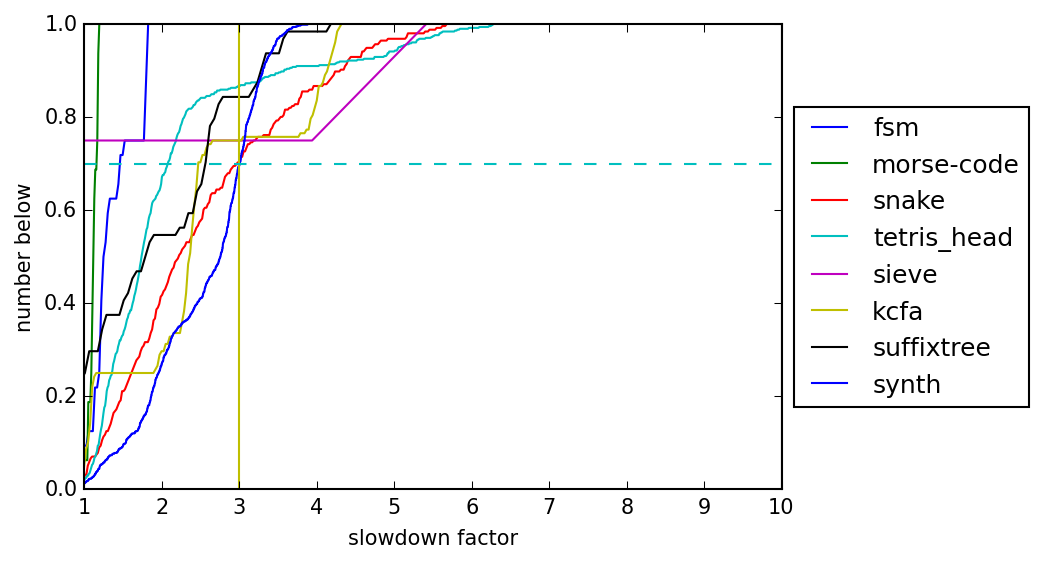

In [52]:
slowdown_cdf(*[(arr, None, strip_name(name)) for arr, name in zip(hs_, all_data_files)],
            name="name",
            many_weights=weights_)

## All Benchmarks for Pycket

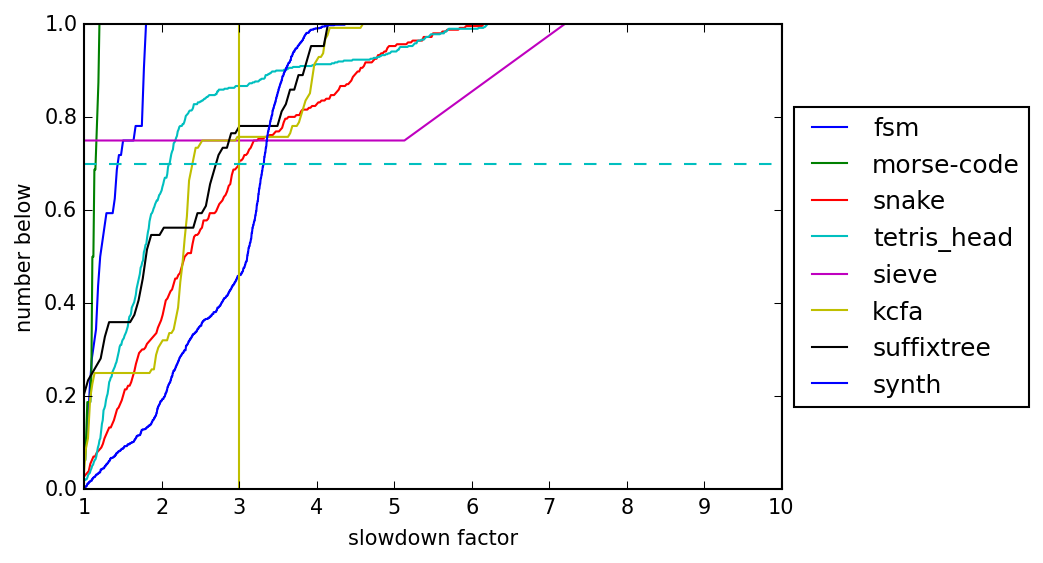

In [53]:
slowdown_cdf(*[(arr, None, strip_name(name)) for arr, name in zip(ps_, all_data_files)],
            name="name",
            many_weights=weights_)

## All Benchmarks for Racket

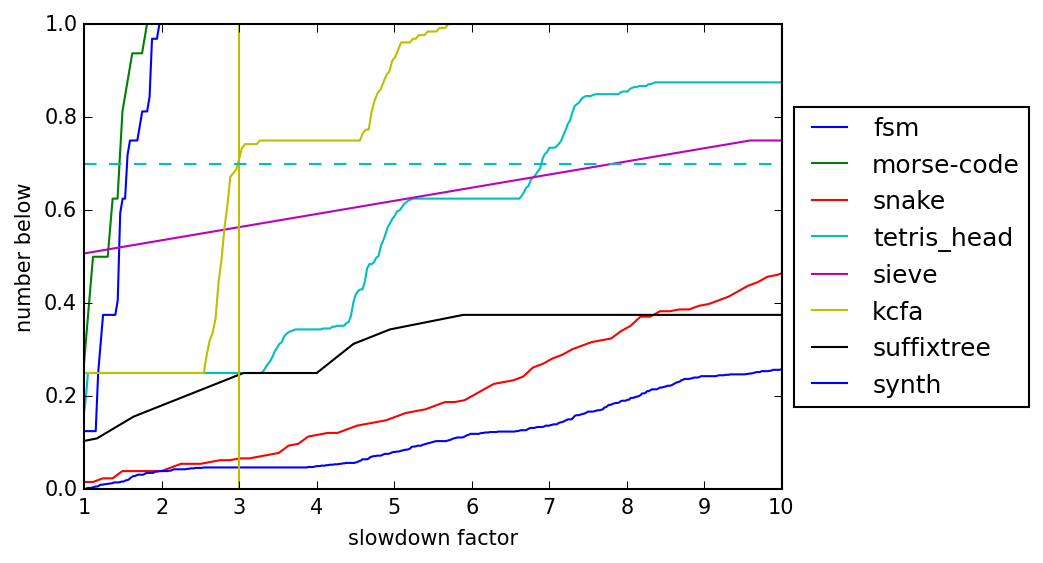

In [54]:
slowdown_cdf(*[(arr, None, strip_name(name)) for arr, name in zip(rs_, all_data_files)],
            name="name",
            many_weights=weights_)

(2036,) (2036,)


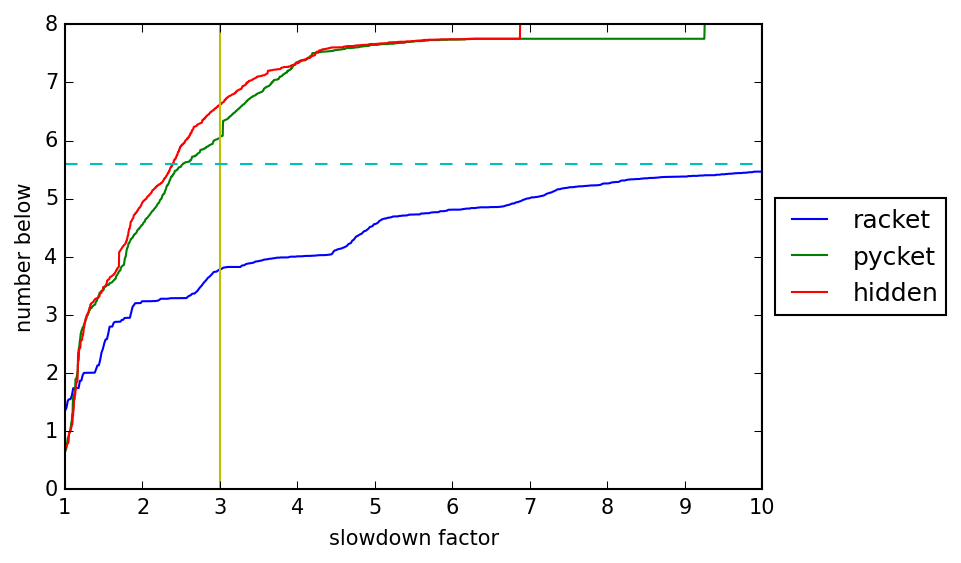

In [55]:
print hs.shape, weights.shape
slowdown_cdf((rs, 'b', 'racket'),
             (ps, 'g', 'pycket'),
             (hs, 'r', 'hidden'),
             weights=weights,
             name="all_data")

# Slowdown Summary Stats

In [56]:
DataFrame({'racket':racket, 'pycket':pycket, 'hidden':hidden}).describe()

,hidden,pycket,racket
count,512.000000,512.000000,512.000000
mean,1649.462891,1645.408203,3779.265625
std,1490.810166,1494.565000,2377.871770
min,495.000000,492.000000,604.000000
25%,782.000000,791.000000,1965.000000
50%,1029.000000,1013.500000,3488.000000
75%,1971.000000,1946.000000,5489.000000
max,8987.000000,9294.000000,8744.000000


# Deliverability Stats

## L = 0

In [57]:
slowdown_graph = lnm.fromkeyvals_transpose(variations, racket_slowdown, pycket_slowdown, hidden_slowdown)
racket_slowdown0, pycket_slowdown0, hidden_slowdown0, tbl = compute_lnm_deliverable(slowdown_graph, 0)
tbl

,racket,hidden,pycket
Max overhead,12.2809,10.5729,11.3897
Mean overhead,5.3080,1.9405,2.0164
Median overhead,4.8989,1.2106,1.2420
300-deliverable,128 (25.00%),433 (84.57%),422 (82.42%)
300/1000-usable,320 (62.50%),71 (13.87%),79 (15.43%)


## L = 1

In [58]:
racket_slowdown1, pycket_slowdown1, hidden_slowdown1, tbl = compute_lnm_deliverable(slowdown_graph, 1)
tbl

,racket,hidden,pycket
Max overhead,4.8596,2.1400,2.2512
Mean overhead,2.1159,0.8811,0.9191
Median overhead,1.0337,0.8306,0.8652
300-deliverable,320 (62.50%),512 (100.00%),512 (100.00%)
300/1000-usable,192 (37.50%),0 (0.00%),0 (0.00%)


## L = 2

In [59]:
racket_slowdown2, pycket_slowdown2, hidden_slowdown2, tbl = compute_lnm_deliverable(slowdown_graph, 2)
tbl

,racket,hidden,pycket
Max overhead,1.0843,1.0941,1.1642
Mean overhead,0.9199,0.7374,0.7705
Median overhead,0.8820,0.7447,0.7721
300-deliverable,512 (100.00%),512 (100.00%),512 (100.00%)
300/1000-usable,0 (0.00%),0 (0.00%),0 (0.00%)


# Slowdown distribution

## L = 0

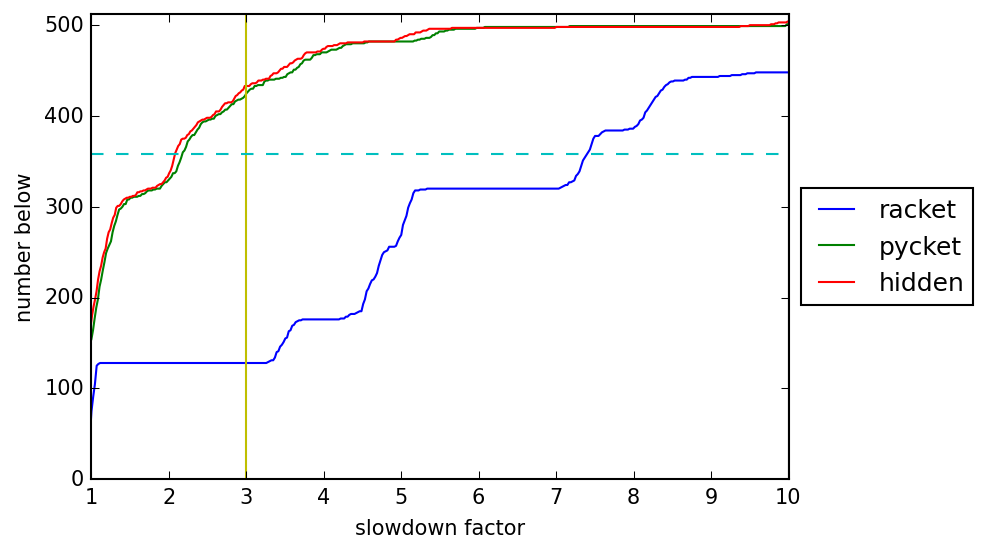

In [60]:
slowdown_cdf((racket_slowdown0, 'b', 'racket'),
             (pycket_slowdown0, 'g', 'pycket'),
             (hidden_slowdown0, 'r', 'hidden'),
             name="%s_l=0" % benchmark)

## L = 1

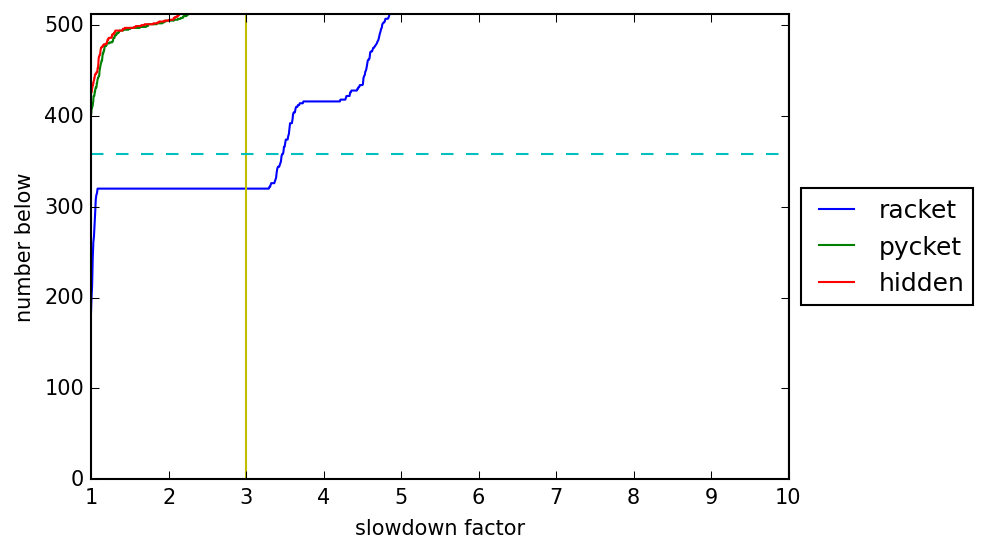

In [61]:
slowdown_cdf((racket_slowdown1, 'b', 'racket'),
             (pycket_slowdown1, 'g', 'pycket'),
             (hidden_slowdown1, 'r', 'hidden'),
             name="%s_l=1" % benchmark)

## L = 2

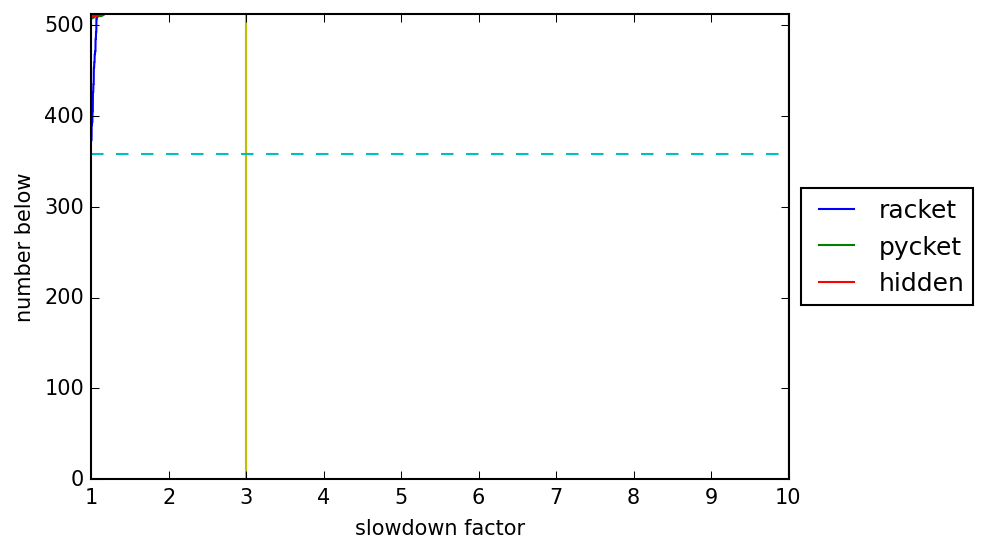

In [62]:
slowdown_cdf((racket_slowdown2, 'b', 'racket'),
             (pycket_slowdown2, 'g', 'pycket'),
             (hidden_slowdown2, 'r', 'hidden'),
             name="%s_l=2" % benchmark)